# 0. Setting

In [264]:
import os
import statsmodels.api as sm     # install statsmodels if not installed
import statsmodels.formula.api as smf
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

random.seed(76019367)
mpl.rcParams['agg.path.chunksize'] = 10000

import statsmodels.api as sm     # install statsmodels if not installed
import statsmodels.formula.api as smf

# 1. Data preparing

In [31]:
file_list = list(os.listdir('D:/Working_Place/new_uber/data/data_processed'))
fhvhv_list = []
for filename in file_list:
    if 'f' in filename:
        fhvhv_list.append(filename)
fhvhv_list

['f1902.parquet',
 'f1903.parquet',
 'f1904.parquet',
 'f1905.parquet',
 'f1906.parquet',
 'f1907.parquet',
 'f1908.parquet',
 'f1909.parquet',
 'f1910.parquet',
 'f1911.parquet',
 'f1912.parquet',
 'f2001.parquet',
 'f2002.parquet',
 'f2003.parquet',
 'f2004.parquet',
 'f2005.parquet',
 'f2006.parquet',
 'f2007.parquet',
 'f2008.parquet',
 'f2009.parquet',
 'f2010.parquet',
 'f2011.parquet',
 'f2012.parquet',
 'f2101.parquet',
 'f2102.parquet',
 'f2103.parquet',
 'f2104.parquet',
 'f2105.parquet',
 'f2106.parquet',
 'f2107.parquet',
 'f2108.parquet',
 'f2109.parquet',
 'f2110.parquet',
 'f2111.parquet',
 'f2112.parquet',
 'f2201.parquet',
 'f2202.parquet',
 'f2203.parquet',
 'f2204.parquet',
 'f2205.parquet',
 'f2206.parquet',
 'f2207.parquet',
 'f2208.parquet',
 'f2209.parquet',
 'f2210.parquet',
 'f2211.parquet',
 'f2212.parquet']

In [32]:
data_samples = []

for file in tqdm(fhvhv_list):
    each_data = pd.read_parquet('D:/Working_Place/new_uber/data/data_processed/'+file)
    each_data_sampled = each_data.sample(frac=0.01)
    data_samples.append(each_data_sampled)
    del each_data
    del each_data_sampled

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [15:16<00:00, 19.51s/it]


In [33]:
fdata_sample = pd.concat(data_samples)
fdata_sample.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed
index,,,,,,,,,,,,,,,,,,,,,
1079641,HV0003,B02878,B02878,2019-02-02 09:45:14,2019-02-02 09:51:18,2019-02-02 09:52:29,2019-02-02 10:08:57,213,20,8.1788,...,0.00,0.0,2.0,8.31,Y,Y,N,N,NaN,29.831489
18360431,HV0003,B02876,B02876,2019-02-26 14:58:01,2019-02-26 14:58:43,2019-02-26 15:00:49,2019-02-26 15:22:05,173,70,5.0876,...,0.00,0.0,3.0,17.05,N,N,N,N,NaN,14.353730
7290379,HV0005,B02510,None,2019-02-10 20:20:24,NaT,2019-02-10 20:24:16,2019-02-10 20:27:26,48,163,0.5152,...,2.75,0.0,0.0,5.39,N,N,N,N,NaN,10.361564
12815512,HV0003,B02878,B02878,2019-02-18 18:27:56,2019-02-18 18:28:50,2019-02-18 18:31:32,2019-02-18 18:50:35,42,166,1.8515,...,0.00,0.0,0.0,10.77,N,N,N,N,NaN,5.836602
10272561,HV0003,B02872,B02872,2019-02-15 08:32:59,2019-02-15 08:36:00,2019-02-15 08:37:44,2019-02-15 08:49:41,151,239,2.7209,...,2.75,0.0,0.0,7.79,N,N,N,N,NaN,13.680503


In [35]:
len(fdata_sample),fdata_sample.columns

(7188333,
 Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
        'request_datetime', 'on_scene_datetime', 'pickup_datetime',
        'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance',
        'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
        'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
        'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
        'wav_request_flag', 'wav_match_flag', 'average_speed'],
       dtype='object'))

# 2. Basic Analysis

# -1. hvfhs_license_number
HV0002 : Juno \
HV0003 : Uber \
HV0004 : Via \
HV0005 : Lyft

In [41]:
fdata_sample_by_license_number = fdata_sample.groupby('hvfhs_license_num').agg({'trip_distance':['count','mean'],
                                                                               'trip_time':'mean',
                                                                               'tips':'mean',
                                                                              'driver_pay':'mean',
                                                                               'average_speed':'mean'})
fdata_sample_by_license_number

trip_distance              trip_time      tips driver_pay  \
                          count      mean         mean      mean       mean   
hvfhs_license_num                                                             
HV0002                    60785  5.883456   991.197828  0.306699  14.158044   
HV0003                  5144087  6.582672  1067.359293  0.661725  15.884411   
HV0004                   133849  5.878428  1241.832206  0.207222   1.972985   
HV0005                  1849612  6.940112  1118.046655  0.874479  14.156139   

                  average_speed  
                           mean  
hvfhs_license_num                
HV0002                19.940504  
HV0003                20.817489  
HV0004                16.784174  
HV0005                20.992043

<AxesSubplot:ylabel='count'>

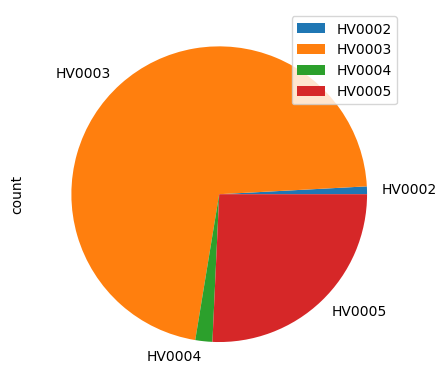

In [45]:
fdata_sample_by_license_number['trip_distance'].plot(kind='pie',y='count')

In [46]:
uber_trip_sample = fdata_sample[fdata_sample.hvfhs_license_num=='HV0003']

# -2. Uber trip sample

In [47]:
uber_trip_sample.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed
index,,,,,,,,,,,,,,,,,,,,,
1079641,HV0003,B02878,B02878,2019-02-02 09:45:14,2019-02-02 09:51:18,2019-02-02 09:52:29,2019-02-02 10:08:57,213,20,8.1788,...,0.00,0.0,2.0,8.31,Y,Y,N,N,NaN,29.831489
18360431,HV0003,B02876,B02876,2019-02-26 14:58:01,2019-02-26 14:58:43,2019-02-26 15:00:49,2019-02-26 15:22:05,173,70,5.0876,...,0.00,0.0,3.0,17.05,N,N,N,N,NaN,14.353730
12815512,HV0003,B02878,B02878,2019-02-18 18:27:56,2019-02-18 18:28:50,2019-02-18 18:31:32,2019-02-18 18:50:35,42,166,1.8515,...,0.00,0.0,0.0,10.77,N,N,N,N,NaN,5.836602
10272561,HV0003,B02872,B02872,2019-02-15 08:32:59,2019-02-15 08:36:00,2019-02-15 08:37:44,2019-02-15 08:49:41,151,239,2.7209,...,2.75,0.0,0.0,7.79,N,N,N,N,NaN,13.680503
5574976,HV0003,B02880,B02880,2019-02-08 20:39:09,2019-02-08 20:39:49,2019-02-08 20:42:41,2019-02-08 20:52:19,90,158,2.0930,...,2.75,0.0,0.0,6.62,N,N,N,N,NaN,13.035986


In [143]:
uber_trip_sample.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'average_speed'],
      dtype='object')

In [148]:
uber_trip_sample['tip_rate']=uber_trip_sample.apply(lambda x: 100*x.tips/(x.base_passenger_fare+x.tolls+x.bcf+x.sales_tax+x.congestion_surcharge+x.airport_fee),axis=1)
uber_trip_sample

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed,tip_rate
index,,,,,,,,,,,,,,,,,,,,,
1079641,HV0003,B02878,B02878,2019-02-02 09:45:14,2019-02-02 09:51:18,2019-02-02 09:52:29,2019-02-02 10:08:57,213,20,8.1788,...,0.0,2.00,8.31,Y,Y,N,N,NaN,29.831489,26.281209
18360431,HV0003,B02876,B02876,2019-02-26 14:58:01,2019-02-26 14:58:43,2019-02-26 15:00:49,2019-02-26 15:22:05,173,70,5.0876,...,0.0,3.00,17.05,N,N,N,N,NaN,14.353730,24.271845
12815512,HV0003,B02878,B02878,2019-02-18 18:27:56,2019-02-18 18:28:50,2019-02-18 18:31:32,2019-02-18 18:50:35,42,166,1.8515,...,0.0,0.00,10.77,N,N,N,N,NaN,5.836602,0.000000
10272561,HV0003,B02872,B02872,2019-02-15 08:32:59,2019-02-15 08:36:00,2019-02-15 08:37:44,2019-02-15 08:49:41,151,239,2.7209,...,0.0,0.00,7.79,N,N,N,N,NaN,13.680503,0.000000
5574976,HV0003,B02880,B02880,2019-02-08 20:39:09,2019-02-08 20:39:49,2019-02-08 20:42:41,2019-02-08 20:52:19,90,158,2.0930,...,0.0,0.00,6.62,N,N,N,N,NaN,13.035986,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633529,HV0003,B03404,B03404,2022-12-04 19:44:40,2022-12-04 19:46:10,2022-12-04 19:47:23,2022-12-04 19:57:32,161,236,3.2522,...,0.0,0.00,8.72,N,N,,N,N,19.224828,0.000000
2098702,HV0003,B03404,B03404,2022-12-03 23:50:26,2022-12-03 23:59:09,2022-12-03 23:59:57,2022-12-04 00:09:42,256,79,3.9767,...,0.0,1.00,10.49,N,N,,N,N,24.472000,5.285412
10187430,HV0003,B03404,B03404,2022-12-16 07:39:15,2022-12-16 07:43:05,2022-12-16 07:43:54,2022-12-16 08:09:26,140,143,4.7334,...,0.0,0.00,29.44,N,N,,N,N,11.122872,0.000000


In [300]:
uber_trip_sample['is_tip'] = uber_trip_sample['tips'].map(lambda x: 0 if x<=0 else 100)
uber_trip_sample

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed,tip_rate,is_tip
index,,,,,,,,,,,,,,,,,,,,,
1079641,HV0003,B02878,B02878,2019-02-02 09:45:14,2019-02-02 09:51:18,2019-02-02 09:52:29,2019-02-02 10:08:57,213,20,8.1788,...,2.00,8.31,Y,Y,N,N,NaN,29.831489,26.281209,100
18360431,HV0003,B02876,B02876,2019-02-26 14:58:01,2019-02-26 14:58:43,2019-02-26 15:00:49,2019-02-26 15:22:05,173,70,5.0876,...,3.00,17.05,N,N,N,N,NaN,14.353730,24.271845,100
12815512,HV0003,B02878,B02878,2019-02-18 18:27:56,2019-02-18 18:28:50,2019-02-18 18:31:32,2019-02-18 18:50:35,42,166,1.8515,...,0.00,10.77,N,N,N,N,NaN,5.836602,0.000000,0
10272561,HV0003,B02872,B02872,2019-02-15 08:32:59,2019-02-15 08:36:00,2019-02-15 08:37:44,2019-02-15 08:49:41,151,239,2.7209,...,0.00,7.79,N,N,N,N,NaN,13.680503,0.000000,0
5574976,HV0003,B02880,B02880,2019-02-08 20:39:09,2019-02-08 20:39:49,2019-02-08 20:42:41,2019-02-08 20:52:19,90,158,2.0930,...,0.00,6.62,N,N,N,N,NaN,13.035986,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633529,HV0003,B03404,B03404,2022-12-04 19:44:40,2022-12-04 19:46:10,2022-12-04 19:47:23,2022-12-04 19:57:32,161,236,3.2522,...,0.00,8.72,N,N,,N,N,19.224828,0.000000,0
2098702,HV0003,B03404,B03404,2022-12-03 23:50:26,2022-12-03 23:59:09,2022-12-03 23:59:57,2022-12-04 00:09:42,256,79,3.9767,...,1.00,10.49,N,N,,N,N,24.472000,5.285412,100
10187430,HV0003,B03404,B03404,2022-12-16 07:39:15,2022-12-16 07:43:05,2022-12-16 07:43:54,2022-12-16 08:09:26,140,143,4.7334,...,0.00,29.44,N,N,,N,N,11.122872,0.000000,0


In [301]:
uber_daily = uber_trip_sample.groupby([uber_trip_sample.pickup_datetime.dt.year,
                                       uber_trip_sample.pickup_datetime.dt.month,
                                        uber_trip_sample.pickup_datetime.dt.day]).agg({'trip_distance':['count','mean'],
                                                                                      'trip_time':'mean',
                                                                                      'base_passenger_fare':'mean',
                                                                                      'tips':'mean',
                                                                                       'tip_rate':['min','max','mean'],
                                                                                       'is_tip':'mean',
                                                                                      'driver_pay':'mean',
                                                                                      'average_speed':'mean'})
uber_daily

trip_distance            \
                                                        count      mean   
pickup_datetime pickup_datetime pickup_datetime                           
2019            2               1                        5366  6.078467   
                                2                        5548  6.041302   
                                3                        4603  6.413851   
                                4                        3631  6.647309   
                                5                        3578  6.517157   
...                                                       ...       ...   
2022            12              27                       3085  6.745263   
                                28                       3250  6.919215   
                                29                       3563  6.867868   
                                30                       3917  7.079310   
                                31                       4583  6.346063   

                                                   trip_time  \
                                                        mean   
pickup_datetime pickup_datetime pickup_datetime                
2019            2               1                1091.551808   
                                2                1032.207823   
                                3                 985.612644   
                                4                1109.146241   
                                5                1093.244271   
...                                                      ...   
2022            12              27               1073.272285   
                                28               1118.003077   
                                29               1118.622790   
                                30               1164.139392   
                                31                968.091643   

                                                base_passenger_fare      tips  \
                                                               mean      mean   
pickup_datetime pickup_datetime pickup_datetime                                 
2019            2               1                         14.639268  0.398181   
                                2                         13.074858  0.298643   
                                3                         13.193002  0.289366   
                                4                         14.399882  0.370903   
                                5                         14.524715  0.382289   
...                                                             ...       ...   
2022            12              27                        21.065964  1.089507   
                                28                        21.192523  0.968366   
                                29                        20.945408  0.939545   
                                30                        21.384552  0.904616   
                                31                        20.742121  0.839400   

                                                tip_rate              \
                                                     min         max   
pickup_datetime pickup_datetime pickup_datetime                        
2019            2               1                    0.0  210.526316   
                                2                    0.0   96.153846   
                                3                    0.0   96.339114   
                                4                    0.0  124.069479   
                                5                    0.0  833.333333   
...                                                  ...         ...   
2022            12              27                   0.0  107.353731   
                                28                   0.0   91.116173   
                                29                   0.0   63.897764   
                                30                   0.0  111.012433   
                             

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

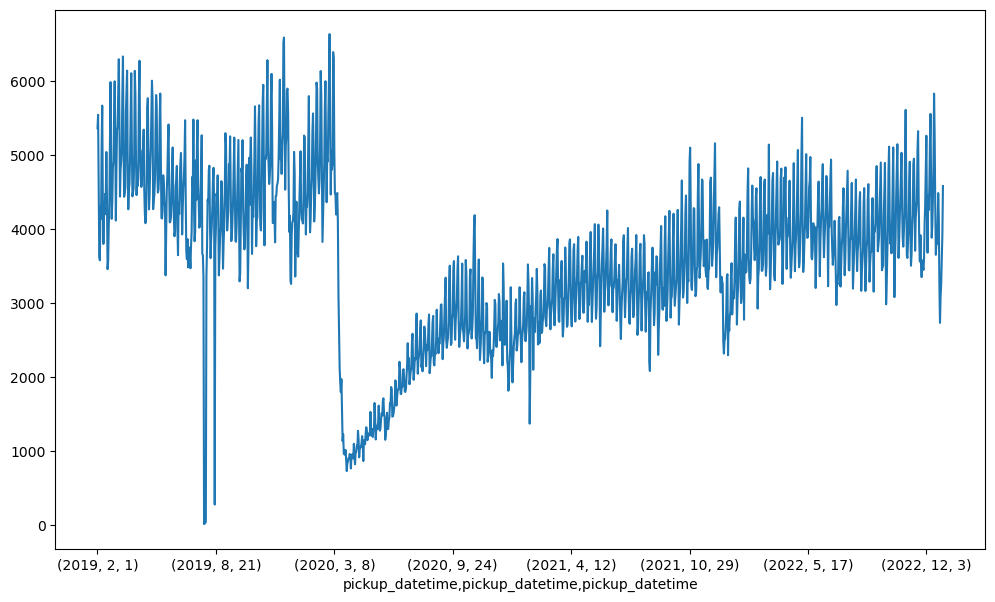

In [58]:
uber_daily['trip_distance','count'].plot(figsize=(12,7))

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

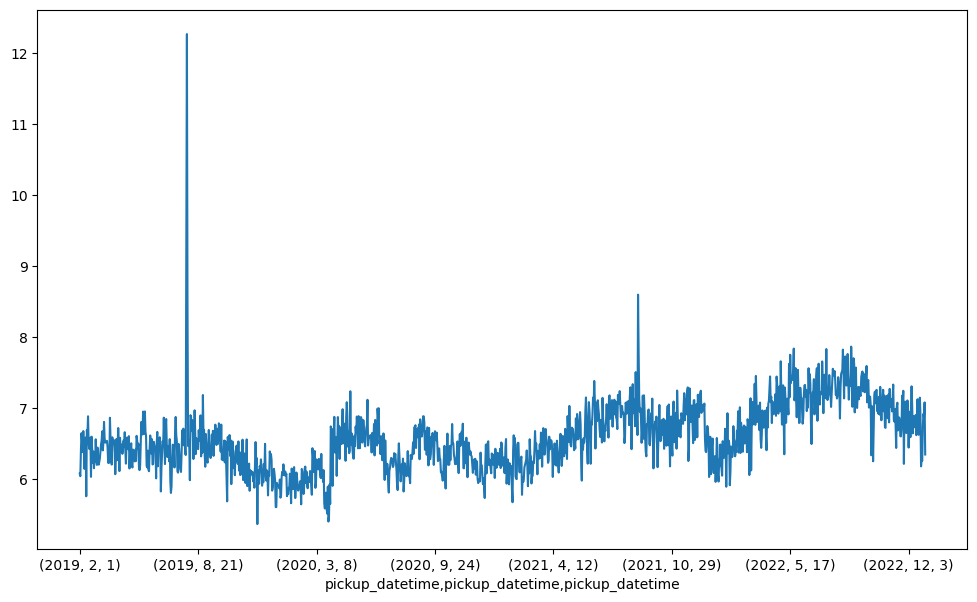

In [60]:
uber_daily['trip_distance','mean'].plot(figsize=(12,7))

In [61]:
uber_daily[uber_daily['trip_distance','mean']>12]

trip_distance             \
                                                        count       mean   
pickup_datetime pickup_datetime pickup_datetime                            
2019            8               1                          16  12.263169   

                                                 trip_time  \
                                                      mean   
pickup_datetime pickup_datetime pickup_datetime              
2019            8               1                1686.3125   

                                                base_passenger_fare   tips  \
                                                               mean   mean   
pickup_datetime pickup_datetime pickup_datetime                              
2019            8               1                         31.633125  0.125   

                                                driver_pay average_speed  
                                                      mean          mean  
pickup_datetime pickup_datetime pickup_datetime                           
2019            8               1                   28.575     22.957519

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

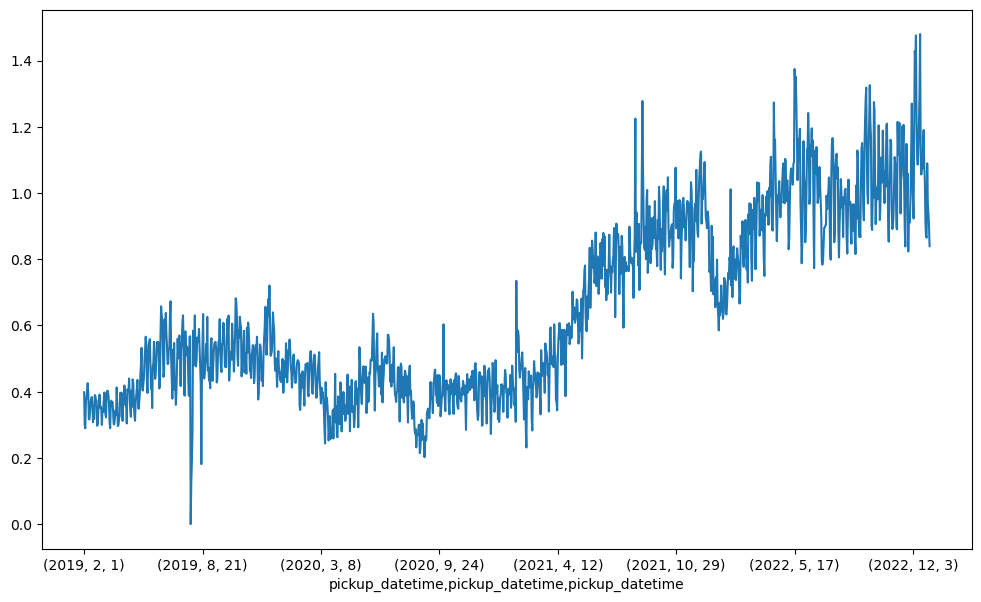

In [59]:
uber_daily['tips','mean'].plot(figsize=(12,7))

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

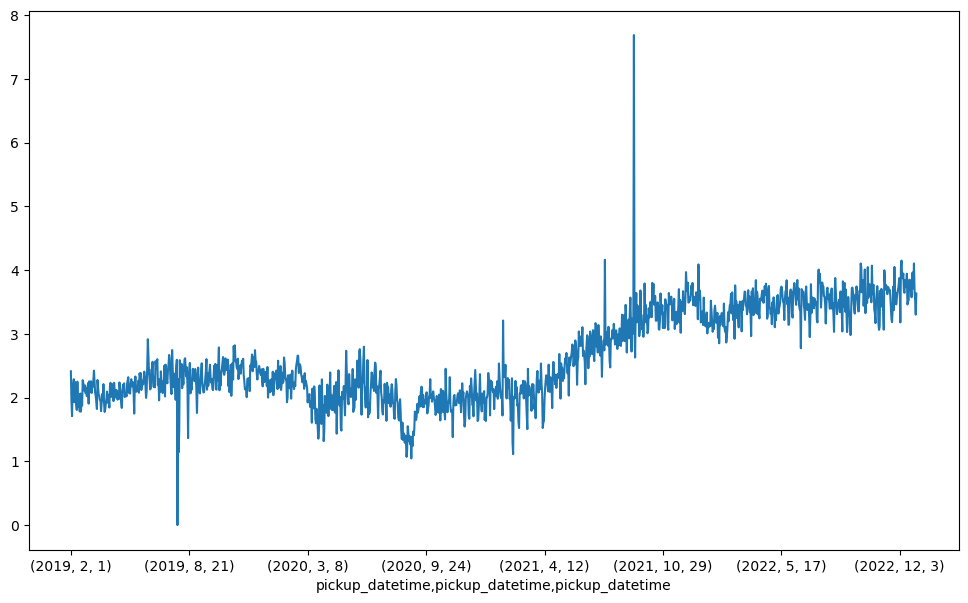

In [150]:
uber_daily['tip_rate','mean'].plot(figsize=(12,7))

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

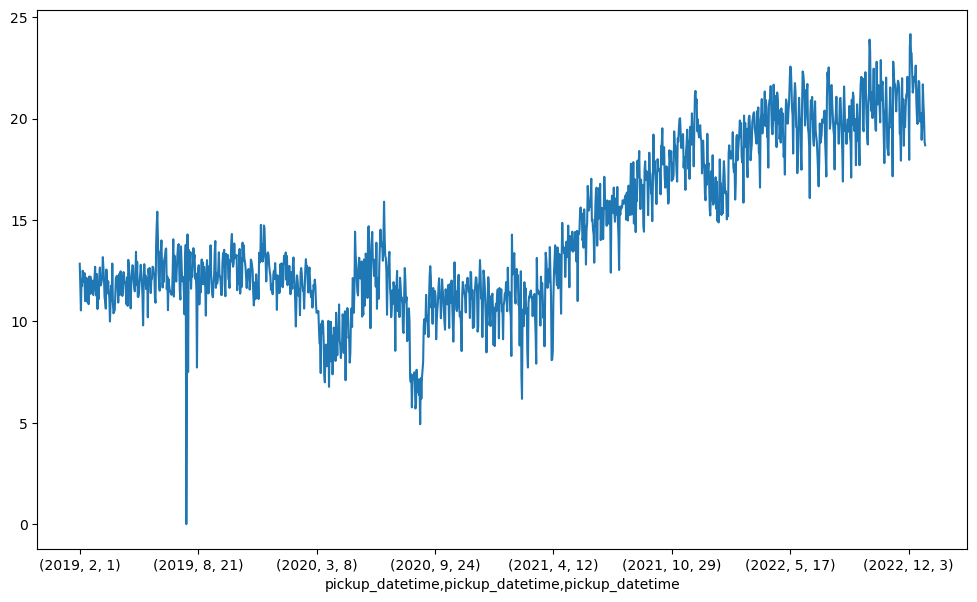

In [302]:
uber_daily['is_tip','mean'].plot(figsize=(12,7))

## *with nonzero tips

In [383]:
uber_sample_with_tip = uber_trip_sample[uber_trip_sample.is_tip==100]
uber_sample_with_tip

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed,tip_rate,is_tip
index,,,,,,,,,,,,,,,,,,,,,
1079641,HV0003,B02878,B02878,2019-02-02 09:45:14,2019-02-02 09:51:18,2019-02-02 09:52:29,2019-02-02 10:08:57,213,20,8.1788,...,2.00,8.31,Y,Y,N,N,NaN,29.831489,26.281209,100
18360431,HV0003,B02876,B02876,2019-02-26 14:58:01,2019-02-26 14:58:43,2019-02-26 15:00:49,2019-02-26 15:22:05,173,70,5.0876,...,3.00,17.05,N,N,N,N,NaN,14.353730,24.271845,100
14591230,HV0003,B02882,B02882,2019-02-21 15:00:23,2019-02-21 15:05:16,2019-02-21 15:10:49,2019-02-21 15:20:14,181,25,1.9320,...,1.50,5.62,Y,Y,N,N,NaN,12.310088,37.220844,100
3869748,HV0003,B02887,B02887,2019-02-06 11:38:32,2019-02-06 11:38:43,2019-02-06 11:39:59,2019-02-06 11:54:43,125,234,2.6082,...,3.00,12.82,N,N,N,N,NaN,10.621629,11.741683,100
5992132,HV0003,B02888,B02888,2019-02-09 10:06:51,2019-02-09 10:07:13,2019-02-09 10:08:52,2019-02-09 10:15:28,89,188,1.3041,...,1.00,6.39,N,N,N,N,NaN,11.885468,13.586957,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6187022,HV0003,B03404,B03404,2022-12-10 08:41:38,2022-12-10 08:42:52,2022-12-10 08:44:53,2022-12-10 09:00:17,164,142,4.5885,...,2.19,11.52,N,N,,N,N,17.877273,9.505208,100
7591932,HV0003,B03404,B03404,2022-12-12 07:36:09,2022-12-12 07:43:25,2022-12-12 07:44:50,2022-12-12 07:57:17,263,238,2.9463,...,6.44,18.20,N,N,,N,N,14.199036,14.983713,100
763754,HV0003,B03404,B03404,2022-12-02 08:24:11,2022-12-02 08:27:49,2022-12-02 08:28:43,2022-12-02 08:45:50,107,230,3.3166,...,2.19,12.33,N,N,,N,N,11.625862,9.972678,100


In [385]:
uber_daily_with_tip = uber_sample_with_tip.groupby([uber_sample_with_tip.pickup_datetime.dt.year,
                                                    uber_sample_with_tip.pickup_datetime.dt.month,
                                                    uber_sample_with_tip.pickup_datetime.dt.day]).agg({'trip_distance':['count','mean'],
                                                                                                      'trip_time':'mean',
                                                                                                      'base_passenger_fare':'mean',
                                                                                                      'tips':'mean',
                                                                                                       'tip_rate':['min','max','mean'],
                                                                                                       'driver_pay':'mean'})
uber_daily_with_tip

trip_distance            \
                                                        count      mean   
pickup_datetime pickup_datetime pickup_datetime                           
2019            2               1                         689  6.438247   
                                2                         645  6.339980   
                                3                         485  7.068066   
                                4                         438  7.299108   
                                5                         420  7.828970   
...                                                       ...       ...   
2022            12              27                        669  7.495765   
                                28                        674  7.273760   
                                29                        715  7.561461   
                                30                        738  8.012215   
                                31                        856  6.218475   

                                                   trip_time  \
                                                        mean   
pickup_datetime pickup_datetime pickup_datetime                
2019            2               1                1126.686502   
                                2                1090.668217   
                                3                1039.694845   
                                4                1198.680365   
                                5                1220.819048   
...                                                      ...   
2022            12              27               1208.152466   
                                28               1198.856083   
                                29               1219.000000   
                                30               1291.184282   
                                31                971.469626   

                                                base_passenger_fare      tips  \
                                                               mean      mean   
pickup_datetime pickup_datetime pickup_datetime                                 
2019            2               1                         17.783672  3.101074   
                                2                         15.238698  2.568791   
                                3                         16.101381  2.746289   
                                4                         17.522009  3.074772   
                                5                         19.437119  3.256738   
...                                                             ...       ...   
2022            12              27                        24.578789  5.024111   
                                28                        23.653680  4.669421   
                                29                        24.146909  4.681958   
                                30                        24.672981  4.801328   
                                31                        21.066332  4.494124   

                                                 tip_rate              \
                                                      min         max   
pickup_datetime pickup_datetime pickup_datetime                         
2019            2               1                1.836547  210.526316   
                                2                2.577320   96.153846   
                                3                2.612330   96.339114   
                                4                2.922268  124.069479   
                                5                2.611875  833.333333   
...                                                   ...         ...   
2022            12              27               3.074085  107.353731   
                                28               0.025038   91.116173   
                                29               2.907018   63.897764   
                                30               2.386635  111.012433   
                

# -3. 스리슬쩍 주가랑 연결해보기

In [280]:
uber_stock = pd.read_csv('D:/Working_Place/new_uber/data/UBER.csv')
uber_stock.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
5,2019-05-17,41.980000,43.290001,41.270000,41.910000,41.910000,20225700
6,2019-05-20,41.189999,41.680000,39.459999,41.590000,41.590000,29222300
7,2019-05-21,42.000000,42.240002,41.250000,41.500000,41.500000,10802900
8,2019-05-22,41.049999,41.279999,40.500000,41.250000,41.250000,9089500
9,2019-05-23,40.799999,41.090000,40.020000,40.470001,40.470001,11119900


In [78]:
uber_daily.loc[2019,2,1]['tips','mean']

0.3981811405143496

In [281]:
def str_to_date(date):
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:])
    return year,month,day
print(str_to_date('2019-05-10'))

(2019, 5, 10)


In [109]:
uber_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...,...
1120,2023-10-20,42.720001,43.349998,42.259998,42.959999,42.959999,13941300
1121,2023-10-23,42.529999,43.970001,42.250000,43.040001,43.040001,11277100
1122,2023-10-24,43.500000,44.325001,43.384998,44.189999,44.189999,17566500
1123,2023-10-25,43.299999,43.490002,42.064999,42.349998,42.349998,16495900


In [282]:
uber_stock['mve']=uber_stock.Close*uber_stock.Volume
uber_stock

,Date,Open,High,Low,Close,Adj Close,Volume,mve
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09
...,...,...,...,...,...,...,...,...
1120,2023-10-20,42.720001,43.349998,42.259998,42.959999,42.959999,13941300,5.989182e+08
1121,2023-10-23,42.529999,43.970001,42.250000,43.040001,43.040001,11277100,4.853664e+08
1122,2023-10-24,43.500000,44.325001,43.384998,44.189999,44.189999,17566500,7.762636e+08
1123,2023-10-25,43.299999,43.490002,42.064999,42.349998,42.349998,16495900,6.986013e+08


In [283]:
def bva(date):
    if date<='2019-06-30':
        return 30.98*(10**9)
    elif date<='2019-09-30':
        return 32.29*(10**9)
    elif date<='2019-12-31':
        return 31.76*(10**9)
    elif date<='2020-03-31':
        return 30.09*(10**9)
    elif date<='2020-06-30':
        return 28.24*(10**9)
    elif date<='2020-09-30':
        return 28.89*(10**9)
    elif date<='2020-12-31':
        return 33.25*(10**9)
    elif date<='2021-03-31':
        return 34.66*(10**9)
    elif date<='2021-06-30':
        return 36.25*(10**9)
    elif date<='2021-09-30':
        return 36.88*(10**9)
    elif date<='2021-12-31':
        return 38.77*(10**9)
    elif date<='2022-03-31':
        return 32.81*(10**9)
    elif date<='2022-06-30':
        return 31.01*(10**9)
    elif date<='2022-09-30':
        return 31.11*(10**9)
    else:
        return 32.11*(10**9)

In [284]:
uber_stock['bva'] = uber_stock.apply(lambda x: bva(x.Date),axis=1)
uber_stock

,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10
...,...,...,...,...,...,...,...,...,...
1120,2023-10-20,42.720001,43.349998,42.259998,42.959999,42.959999,13941300,5.989182e+08,3.211000e+10
1121,2023-10-23,42.529999,43.970001,42.250000,43.040001,43.040001,11277100,4.853664e+08,3.211000e+10
1122,2023-10-24,43.500000,44.325001,43.384998,44.189999,44.189999,17566500,7.762636e+08,3.211000e+10
1123,2023-10-25,43.299999,43.490002,42.064999,42.349998,42.349998,16495900,6.986013e+08,3.211000e+10


In [285]:
def bvl(date):
    if date<='2019-06-30':
        return 15.058*(10**9)
    elif date<='2019-09-30':
        return 16.550*(10**9)
    elif date<='2019-12-31':
        return 16.889*(10**9)
    elif date<='2020-03-31':
        return 18.062*(10**9)
    elif date<='2020-06-30':
        return 18.001*(10**9)
    elif date<='2020-09-30':
        return 19.261*(10**9)
    elif date<='2020-12-31':
        return 20.285*(10**9)
    elif date<='2021-03-31':
        return 21.057*(10**9)
    elif date<='2021-06-30':
        return 22.076*(10**9)
    elif date<='2021-09-30':
        return 22.828*(10**9)
    elif date<='2021-12-31':
        return 23.629*(10**9)
    elif date<='2022-03-31':
        return 23.199*(10**9)
    elif date<='2022-06-30':
        return 23.645*(10**9)
    elif date<='2022-09-30':
        return 24.142*(10**9)
    else:
        return 24.035*(10**9)

In [286]:
uber_stock['bvl'] = uber_stock.apply(lambda x: bvl(x.Date),axis=1)
uber_stock

,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvl
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10,1.505800e+10
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10,1.505800e+10
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10,1.505800e+10
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10,1.505800e+10
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10,1.505800e+10
...,...,...,...,...,...,...,...,...,...,...
1120,2023-10-20,42.720001,43.349998,42.259998,42.959999,42.959999,13941300,5.989182e+08,3.211000e+10,2.403500e+10
1121,2023-10-23,42.529999,43.970001,42.250000,43.040001,43.040001,11277100,4.853664e+08,3.211000e+10,2.403500e+10
1122,2023-10-24,43.500000,44.325001,43.384998,44.189999,44.189999,17566500,7.762636e+08,3.211000e+10,2.403500e+10
1123,2023-10-25,43.299999,43.490002,42.064999,42.349998,42.349998,16495900,6.986013e+08,3.211000e+10,2.403500e+10


In [287]:
uber_stock_under_2023 = uber_stock[uber_stock.Date<'2023']
uber_stock_under_2023

,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvl
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10,1.505800e+10
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10,1.505800e+10
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10,1.505800e+10
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10,1.505800e+10
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10,1.505800e+10
...,...,...,...,...,...,...,...,...,...,...
914,2022-12-23,24.459999,24.725000,24.162001,24.639999,24.639999,11610000,2.860704e+08,3.211000e+10,2.403500e+10
915,2022-12-27,24.290001,24.700001,23.900000,24.400000,24.400000,15258600,3.723098e+08,3.211000e+10,2.403500e+10
916,2022-12-28,24.209999,24.719999,24.020000,24.590000,24.590000,15669200,3.853056e+08,3.211000e+10,2.403500e+10
917,2022-12-29,24.750000,25.375000,24.290001,24.910000,24.910000,17828300,4.441030e+08,3.211000e+10,2.403500e+10


In [303]:
tip_as_input = []
for i in uber_stock_under_2023.Date:
    year,month,day = str_to_date(i)
    tip_as_input.append(uber_daily.loc[year,month,day]['tips','mean'])
uber_stock_under_2023['tip']=tip_as_input

tip_rate_as_input = []
for i in uber_stock_under_2023.Date:
    year,month,day = str_to_date(i)
    tip_rate_as_input.append(uber_daily.loc[year,month,day]['tip_rate','mean'])
uber_stock_under_2023['tip_rate']=tip_rate_as_input

is_tip_as_input = []
for i in uber_stock_under_2023.Date:
    year,month,day = str_to_date(i)
    is_tip_as_input.append(uber_daily.loc[year,month,day]['is_tip','mean'])
uber_stock_under_2023['is_tip']=is_tip_as_input

uber_stock_under_2023

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvl,tip,tip_rate,is_tip,year,month,day,ln_mve,ln_bva,ln_bvl
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10,1.505800e+10,0.416354,2.074431,11.215480,2019,5,10,22.770368,24.156608,23.435175
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10,1.505800e+10,0.442704,2.214306,11.947181,2019,5,13,21.804160,24.156608,23.435175
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10,1.505800e+10,0.494427,2.289315,12.302558,2019,5,14,21.346300,24.156608,23.435175
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10,1.505800e+10,0.525925,2.176751,12.787102,2019,5,15,21.122039,24.156608,23.435175
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10,1.505800e+10,0.566001,2.219457,12.391626,2019,5,16,21.217332,24.156608,23.435175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,2022-12-23,24.459999,24.725000,24.162001,24.639999,24.639999,11610000,2.860704e+08,3.211000e+10,2.403500e+10,1.037366,3.574811,19.830660,2022,12,23,19.471748,24.192433,23.902777
915,2022-12-27,24.290001,24.700001,23.900000,24.400000,24.400000,15258600,3.723098e+08,3.211000e+10,2.403500e+10,1.089507,4.105626,21.685575,2022,12,27,19.735237,24.192433,23.902777
916,2022-12-28,24.209999,24.719999,24.020000,24.590000,24.590000,15669200,3.853056e+08,3.211000e+10,2.403500e+10,0.968366,3.684118,20.738462,2022,12,28,19.769547,24.192433,23.902777
917,2022-12-29,24.750000,25.375000,24.290001,24.910000,24.910000,17828300,4.441030e+08,3.211000e+10,2.403500e+10,0.939545,3.535639,20.067359,2022,12,29,19.911567,24.192433,23.902777


In [353]:
trip_amount_as_input = []
for i in uber_stock_under_2023.Date:
    year,month,day = str_to_date(i)
    trip_amount_as_input.append(uber_daily.loc[year,month,day]['trip_distance','count'])
uber_stock_under_2023['trip_amount']=trip_amount_as_input

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [289]:
uber_stock_under_2023['year'] = uber_stock_under_2023['Date'].map(lambda x: str_to_date(x)[0])
uber_stock_under_2023['month'] = uber_stock_under_2023['Date'].map(lambda x: str_to_date(x)[1])
uber_stock_under_2023['day'] = uber_stock_under_2023['Date'].map(lambda x: str_to_date(x)[2])

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [334]:
def quarter(month):
    if 1<=month<=3:
        return 0
    elif month<=6:
        return 1
    elif month<=9:
        return 2
    else:
        return 3

In [335]:
uber_stock_under_2023['quarter']=uber_stock_under_2023['month'].map(lambda x:quarter(x))

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [291]:
uber_stock_under_2023['ln_mve'] = np.log(uber_stock_under_2023.mve)
uber_stock_under_2023['ln_bva'] = np.log(uber_stock_under_2023.bva)
uber_stock_under_2023['ln_bvl'] = np.log(uber_stock_under_2023.bvl)

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [304]:
uber_stock_under_2023[(uber_stock_under_2023.tip<=0) |
                     (uber_stock_under_2023.tip_rate<=0)|
                     (uber_stock_under_2023.is_tip<=0)]

,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvl,tip,tip_rate,is_tip,year,month,day,ln_mve,ln_bva,ln_bvl
56,2019-07-31,42.599998,42.98,41.84,42.139999,42.139999,5970800,2.516095e+08,3.229000e+10,1.655000e+10,0.0,0.0,0.0,2019,7,31,19.343389,24.198023,23.529652


In [318]:
min(uber_stock_under_2023.tip[uber_stock_under_2023.tip>0]),min(uber_stock_under_2023.tip_rate[uber_stock_under_2023.tip_rate>0]),min(uber_stock_under_2023.is_tip[uber_stock_under_2023.is_tip>0])

(0.125, 1.1134588379970018, 6.176351076798049)

In [320]:
uber_stock_under_2023.loc[56,'tip']=0.125
uber_stock_under_2023.loc[56,'tip_rate'] = 1.1134588379970018
uber_stock_under_2023.loc[56,'is_tip'] = 6.176351076798049

D:\Anaconda\envs\new_uber\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [355]:
uber_stock_under_2023['ln_tip'] = np.log(uber_stock_under_2023.tip)
uber_stock_under_2023['ln_tip_rate'] = np.log(uber_stock_under_2023.tip_rate)
uber_stock_under_2023['ln_is_tip'] = np.log(uber_stock_under_2023.is_tip)
uber_stock_under_2023['ln_trip_amount'] = np.log(uber_stock_under_2023.trip_amount)

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [356]:
uber_stock_under_2023.head()

,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvl,...,day,ln_mve,ln_bva,ln_bvl,ln_tip,ln_tip_rate,ln_is_tip,quarter,trip_amount,ln_trip_amount
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10,1.505800e+10,...,10,22.770368,24.156608,23.435175,-0.876220,0.729687,2.417295,1,5323.0,8.579792
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10,1.505800e+10,...,13,21.804160,24.156608,23.435175,-0.814854,0.794939,2.480495,1,4771.0,8.470311
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10,1.505800e+10,...,14,21.346300,24.156608,23.435175,-0.704355,0.828253,2.509807,1,4495.0,8.410721
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10,1.505800e+10,...,15,21.122039,24.156608,23.435175,-0.642596,0.777834,2.548437,1,4528.0,8.418036
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10,1.505800e+10,...,16,21.217332,24.156608,23.435175,-0.569159,0.797263,2.517021,1,4729.0,8.461469


## 0) default

In [369]:
zeroth_regression = smf.ols("ln_mve ~ ln_bva + ln_bvl + C(year)", 
                           data=uber_stock_under_2023).fit()
print(zeroth_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     66.41
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           3.24e-59
Time:                        14:08:08   Log-Likelihood:                -638.68
No. Observations:                 919   AIC:                             1289.
Df Residuals:                     913   BIC:                             1318.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          53.4247     10.258     

## 1) just tip

In [358]:
first_regression = smf.ols("mve ~ bva + bvl + tip", 
                           data=uber_stock_under_2023).fit()
print(first_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     15.45
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           8.24e-10
Time:                        14:00:31   Log-Likelihood:                -19851.
No. Observations:                 919   AIC:                         3.971e+04
Df Residuals:                     915   BIC:                         3.973e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.851e+08   2.34e+08     -2.073      0.0

In [337]:
first_regression = smf.ols("mve ~ bva + bvl + tip + C(year)+C(quarter)", 
                           data=uber_stock_under_2023).fit()
print(first_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     15.06
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           5.38e-23
Time:                        13:37:09   Log-Likelihood:                -19810.
No. Observations:                 919   AIC:                         3.964e+04
Df Residuals:                     909   BIC:                         3.969e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.819e+08   8.83e+08     

In [323]:
second_regression = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip", 
                           data=uber_stock_under_2023).fit()
print(second_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     43.40
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           3.18e-26
Time:                        13:27:21   Log-Likelihood:                -720.10
No. Observations:                 919   AIC:                             1448.
Df Residuals:                     915   BIC:                             1467.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.3383      5.796     -5.924      0.0

In [351]:
second_regression = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip+C(year)", 
                           data=uber_stock_under_2023).fit()
print(second_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     55.33
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           2.49e-58
Time:                        13:55:21   Log-Likelihood:                -638.57
No. Observations:                 919   AIC:                             1291.
Df Residuals:                     912   BIC:                             1325.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          55.3025     11.005     

In [359]:
second_regression = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip+ln_trip_amount+C(year)", 
                           data=uber_stock_under_2023).fit()
print(second_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     48.77
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           5.75e-59
Time:                        14:00:47   Log-Likelihood:                -634.97
No. Observations:                 919   AIC:                             1286.
Df Residuals:                     911   BIC:                             1325.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          54.4310     10.973     

## 2) tip rate

In [339]:
tip_rate_regression = smf.ols("mve ~ bva + bvl + tip_rate", 
                           data=uber_stock_under_2023).fit()
print(tip_rate_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     11.27
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           2.91e-07
Time:                        13:37:38   Log-Likelihood:                -19857.
No. Observations:                 919   AIC:                         3.972e+04
Df Residuals:                     915   BIC:                         3.974e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.441e+08   2.26e+08     -1.078      0.2

In [352]:
tip_rate_regression = smf.ols("mve ~ bva + bvl + tip_rate+C(year)", 
                           data=uber_stock_under_2023).fit()
print(tip_rate_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     19.60
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.34e-21
Time:                        13:55:48   Log-Likelihood:                -19818.
No. Observations:                 919   AIC:                         3.965e+04
Df Residuals:                     912   BIC:                         3.968e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         1.18e+09   4.57e+08     

In [341]:
ln_tip_rate_regression = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip_rate", 
                           data=uber_stock_under_2023).fit()
print(ln_tip_rate_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     36.89
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.65e-22
Time:                        13:37:53   Log-Likelihood:                -728.76
No. Observations:                 919   AIC:                             1466.
Df Residuals:                     915   BIC:                             1485.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -27.8591      5.654     -4.927      

<AxesSubplot:>

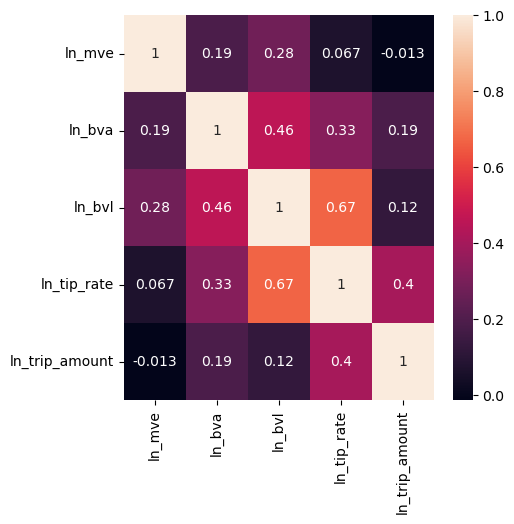

In [363]:
corr_table = uber_stock_under_2023[['ln_mve','ln_bva','ln_bvl','ln_tip_rate','ln_trip_amount']].corr()
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(corr_table, annot=True)

In [343]:
ln_tip_rate_regression_with_date = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip_rate + C(year)", 
                                           data=uber_stock_under_2023).fit()
print(ln_tip_rate_regression_with_date.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     55.71
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.10e-58
Time:                        13:47:59   Log-Likelihood:                -637.74
No. Observations:                 919   AIC:                             1289.
Df Residuals:                     912   BIC:                             1323.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          58.0337     10.790     

In [361]:
ln_tip_rate_ln_trip_amount_regression_with_date = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip_rate + ln_trip_amount + C(year)", 
                                                           data=uber_stock_under_2023).fit()
print(ln_tip_rate_ln_trip_amount_regression_with_date.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     48.79
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           5.57e-59
Time:                        14:01:50   Log-Likelihood:                -634.94
No. Observations:                 919   AIC:                             1286.
Df Residuals:                     911   BIC:                             1324.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          59.5855     10.784     

## 3) is_tip

In [345]:
is_tip_regression = smf.ols("mve ~ bva + bvl + is_tip", 
                            data=uber_stock_under_2023).fit()
print(is_tip_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     12.57
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           4.68e-08
Time:                        13:48:24   Log-Likelihood:                -19855.
No. Observations:                 919   AIC:                         3.972e+04
Df Residuals:                     915   BIC:                         3.974e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.331e+08   2.25e+08     -1.036      0.3

In [346]:
is_tip_regression_with_date = smf.ols("mve ~ bva + bvl + is_tip + C(year)", 
                            data=uber_stock_under_2023).fit()
print(is_tip_regression_with_date.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     19.64
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.22e-21
Time:                        13:48:35   Log-Likelihood:                -19818.
No. Observations:                 919   AIC:                         3.965e+04
Df Residuals:                     912   BIC:                         3.968e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.204e+09    4.6e+08     

In [347]:
ln_is_tip_regression_with_date = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_is_tip + C(year)", 
                            data=uber_stock_under_2023).fit()
print(ln_is_tip_regression_with_date.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     55.63
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.32e-58
Time:                        13:49:01   Log-Likelihood:                -637.93
No. Observations:                 919   AIC:                             1290.
Df Residuals:                     912   BIC:                             1324.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          58.1859     10.964     

In [368]:
ln_is_tip_ln_trip_amount_regression_with_date = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_is_tip + ln_trip_amount+ C(year)", 
                                                        data=uber_stock_under_2023).fit()
print(ln_is_tip_ln_trip_amount_regression_with_date.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     48.74
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           6.33e-59
Time:                        14:05:09   Log-Likelihood:                -635.07
No. Observations:                 919   AIC:                             1286.
Df Residuals:                     911   BIC:                             1325.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          59.3016     10.946     

## 4) How about COVID-19 effect?

In [371]:
uber_stock_under_2023['covid19']=uber_stock_under_2023.Date.map(lambda x: 1 if x>='2020-03-13' else 0)
uber_stock_under_2023.head()

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvl,...,ln_mve,ln_bva,ln_bvl,ln_tip,ln_tip_rate,ln_is_tip,quarter,trip_amount,ln_trip_amount,covid19
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10,1.505800e+10,...,22.770368,24.156608,23.435175,-0.876220,0.729687,2.417295,1,5323.0,8.579792,0
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10,1.505800e+10,...,21.804160,24.156608,23.435175,-0.814854,0.794939,2.480495,1,4771.0,8.470311,0
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10,1.505800e+10,...,21.346300,24.156608,23.435175,-0.704355,0.828253,2.509807,1,4495.0,8.410721,0
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10,1.505800e+10,...,21.122039,24.156608,23.435175,-0.642596,0.777834,2.548437,1,4528.0,8.418036,0
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10,1.505800e+10,...,21.217332,24.156608,23.435175,-0.569159,0.797263,2.517021,1,4729.0,8.461469,0


In [380]:
ln_is_tip_regression_with_date_covid19 = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_is_tip + ln_trip_amount+ C(year) +C(covid19)", 
                            data=uber_stock_under_2023).fit()
print(ln_is_tip_regression_with_date_covid19.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     42.60
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           4.59e-58
Time:                        14:29:07   Log-Likelihood:                -635.07
No. Observations:                 919   AIC:                             1288.
Df Residuals:                     910   BIC:                             1332.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          59.5258     11.448     

## 5) How about nonzero tips?

In [389]:
tip_as_input = []
for i in uber_stock_under_2023.Date:
    year,month,day = str_to_date(i)
    if year==2019 and month==7 and day==31:
        tip_as_input.append(min(tip_as_input))
    else:
        tip_as_input.append(uber_daily_with_tip.loc[year,month,day]['tips','mean'])
uber_stock_under_2023['nonzero_tip']=tip_as_input

tip_rate_as_input = []
for i in uber_stock_under_2023.Date:
    year,month,day = str_to_date(i)
    if year==2019 and month==7 and day==31:
        tip_rate_as_input.append(min(tip_rate_as_input))
    else:
        tip_rate_as_input.append(uber_daily_with_tip.loc[year,month,day]['tip_rate','mean'])
uber_stock_under_2023['nonzero_tip_rate']=tip_rate_as_input

uber_stock_under_2023

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvl,...,ln_bvl,ln_tip,ln_tip_rate,ln_is_tip,quarter,trip_amount,ln_trip_amount,covid19,nonzero_tip,nonzero_tip_rate
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10,1.505800e+10,...,23.435175,-0.876220,0.729687,2.417295,1,5323.0,8.579792,0,3.712312,18.496145
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10,1.505800e+10,...,23.435175,-0.814854,0.794939,2.480495,1,4771.0,8.470311,0,3.705509,18.534132
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10,1.505800e+10,...,23.435175,-0.704355,0.828253,2.509807,1,4495.0,8.410721,0,4.018897,18.608444
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10,1.505800e+10,...,23.435175,-0.642596,0.777834,2.548437,1,4528.0,8.418036,0,4.112936,17.023023
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10,1.505800e+10,...,23.435175,-0.569159,0.797263,2.517021,1,4729.0,8.461469,0,4.567611,17.910943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,2022-12-23,24.459999,24.725000,24.162001,24.639999,24.639999,11610000,2.860704e+08,3.211000e+10,2.403500e+10,...,23.902777,0.036685,1.273912,2.987229,3,4488.0,8.409162,1,5.231124,18.026687
915,2022-12-27,24.290001,24.700001,23.900000,24.400000,24.400000,15258600,3.723098e+08,3.211000e+10,2.403500e+10,...,23.902777,0.085726,1.412358,3.076647,3,3085.0,8.034307,1,5.024111,18.932519
916,2022-12-28,24.209999,24.719999,24.020000,24.590000,24.590000,15669200,3.853056e+08,3.211000e+10,2.403500e+10,...,23.902777,-0.032145,1.304031,3.031990,3,3250.0,8.086410,1,4.669421,17.764663
917,2022-12-29,24.750000,25.375000,24.290001,24.910000,24.910000,17828300,4.441030e+08,3.211000e+10,2.403500e+10,...,23.902777,-0.062359,1.262894,2.999095,3,3563.0,8.178358,1,4.681958,17.618855


In [390]:
uber_stock_under_2023['ln_nonzero_tip'] = np.log(uber_stock_under_2023.nonzero_tip)
uber_stock_under_2023['ln_nonzero_tip_rate'] = np.log(uber_stock_under_2023.nonzero_tip_rate)


D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [393]:
ln_nonzero_tip_rate_regression_with_date = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_nonzero_tip_rate + C(year)", 
                                           data=uber_stock_under_2023).fit()
print(ln_nonzero_tip_rate_regression_with_date.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     55.32
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           2.58e-58
Time:                        14:51:20   Log-Likelihood:                -638.61
No. Observations:                 919   AIC:                             1291.
Df Residuals:                     912   BIC:                             1325.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              52.7278    

# 3. Graphs

In [381]:
uber_trip_sample

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed,tip_rate,is_tip
index,,,,,,,,,,,,,,,,,,,,,
1079641,HV0003,B02878,B02878,2019-02-02 09:45:14,2019-02-02 09:51:18,2019-02-02 09:52:29,2019-02-02 10:08:57,213,20,8.1788,...,2.00,8.31,Y,Y,N,N,NaN,29.831489,26.281209,100
18360431,HV0003,B02876,B02876,2019-02-26 14:58:01,2019-02-26 14:58:43,2019-02-26 15:00:49,2019-02-26 15:22:05,173,70,5.0876,...,3.00,17.05,N,N,N,N,NaN,14.353730,24.271845,100
12815512,HV0003,B02878,B02878,2019-02-18 18:27:56,2019-02-18 18:28:50,2019-02-18 18:31:32,2019-02-18 18:50:35,42,166,1.8515,...,0.00,10.77,N,N,N,N,NaN,5.836602,0.000000,0
10272561,HV0003,B02872,B02872,2019-02-15 08:32:59,2019-02-15 08:36:00,2019-02-15 08:37:44,2019-02-15 08:49:41,151,239,2.7209,...,0.00,7.79,N,N,N,N,NaN,13.680503,0.000000,0
5574976,HV0003,B02880,B02880,2019-02-08 20:39:09,2019-02-08 20:39:49,2019-02-08 20:42:41,2019-02-08 20:52:19,90,158,2.0930,...,0.00,6.62,N,N,N,N,NaN,13.035986,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633529,HV0003,B03404,B03404,2022-12-04 19:44:40,2022-12-04 19:46:10,2022-12-04 19:47:23,2022-12-04 19:57:32,161,236,3.2522,...,0.00,8.72,N,N,,N,N,19.224828,0.000000,0
2098702,HV0003,B03404,B03404,2022-12-03 23:50:26,2022-12-03 23:59:09,2022-12-03 23:59:57,2022-12-04 00:09:42,256,79,3.9767,...,1.00,10.49,N,N,,N,N,24.472000,5.285412,100
10187430,HV0003,B03404,B03404,2022-12-16 07:39:15,2022-12-16 07:43:05,2022-12-16 07:43:54,2022-12-16 08:09:26,140,143,4.7334,...,0.00,29.44,N,N,,N,N,11.122872,0.000000,0


In [161]:
uber_trip_sample.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'average_speed', 'tip_rate'],
      dtype='object')

# -1. by Time

<AxesSubplot:xlabel='pickup_datetime'>

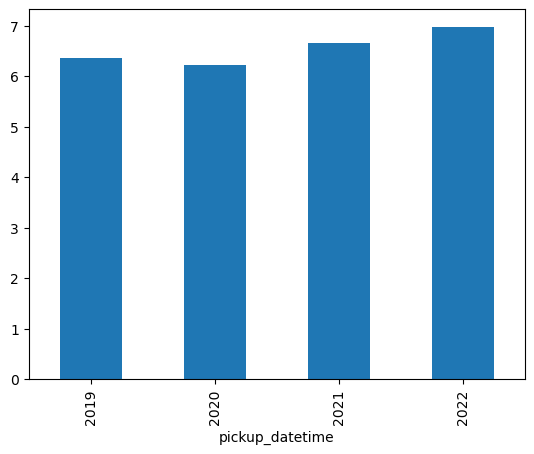

In [165]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'trip_distance':['mean','var']})[('trip_distance','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

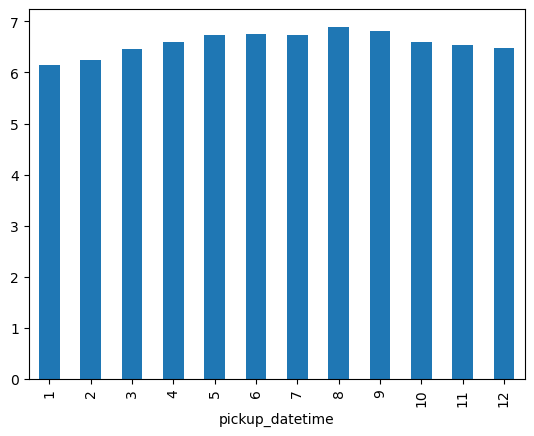

In [166]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'trip_distance':['mean','var']})[('trip_distance','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

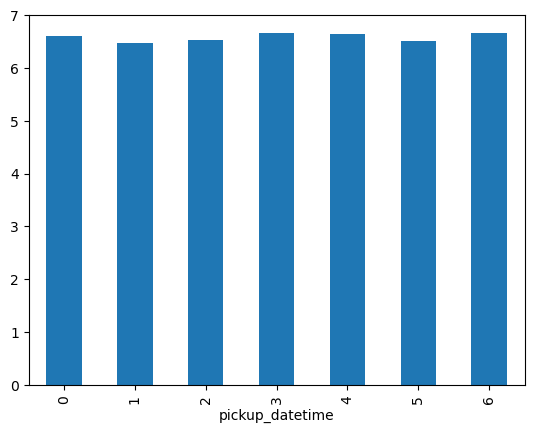

In [167]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'trip_distance':['mean','var']})[('trip_distance','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

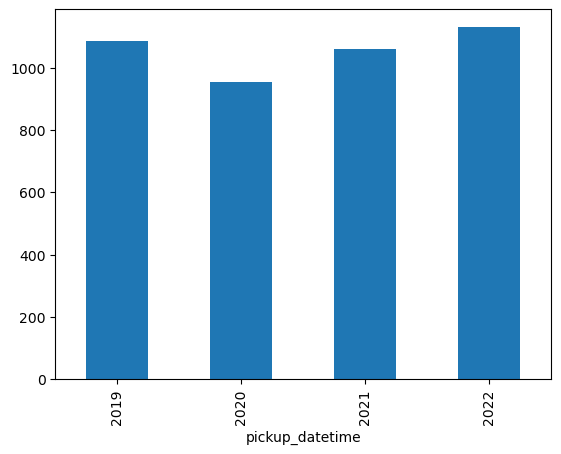

In [163]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'trip_time':['mean','var']})[('trip_time','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

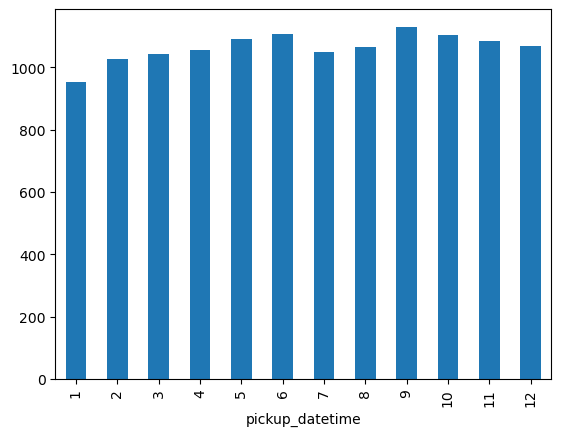

In [168]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'trip_time':['mean','var']})[('trip_time','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

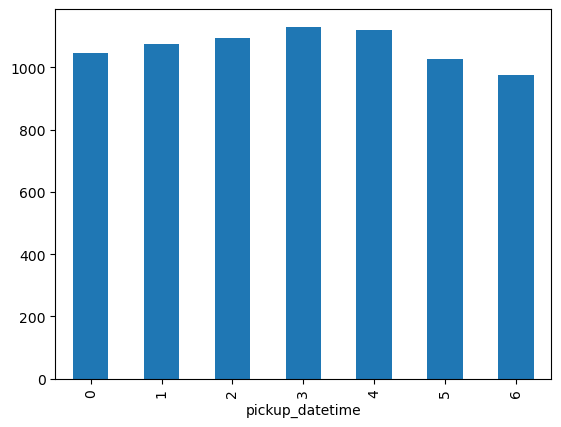

In [169]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'trip_time':['mean','var']})[('trip_time','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

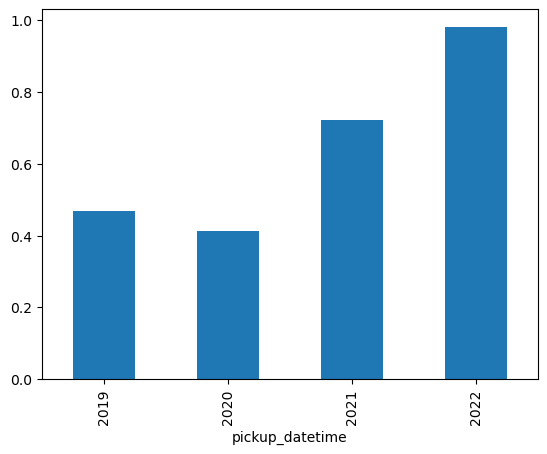

In [171]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'tips':['mean','var']})[('tips','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

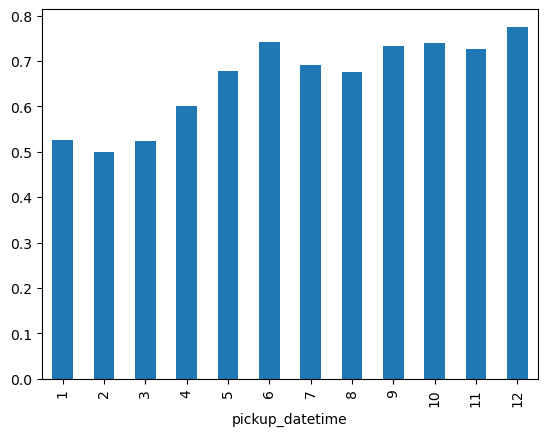

In [172]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'tips':['mean','var']})[('tips','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

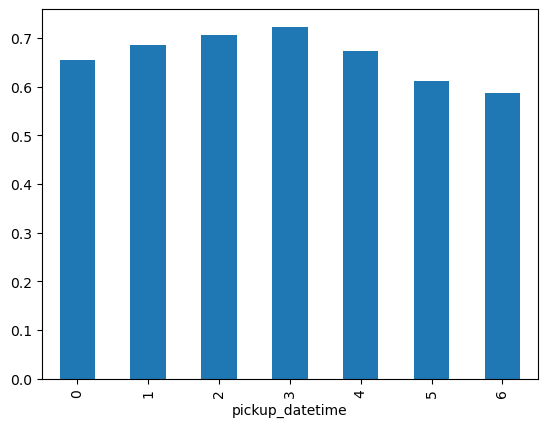

In [173]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'tips':['mean','var']})[('tips','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

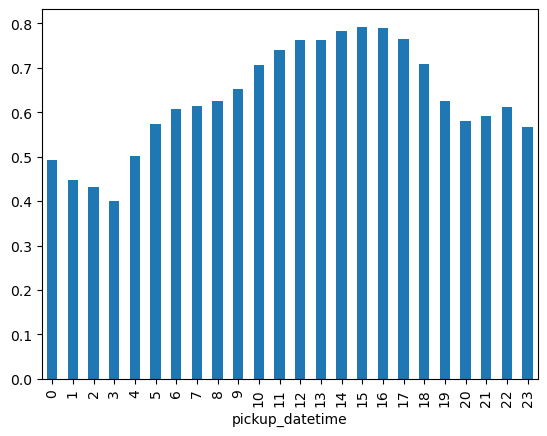

In [177]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.hour).agg({'tips':['mean','var']})[('tips','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

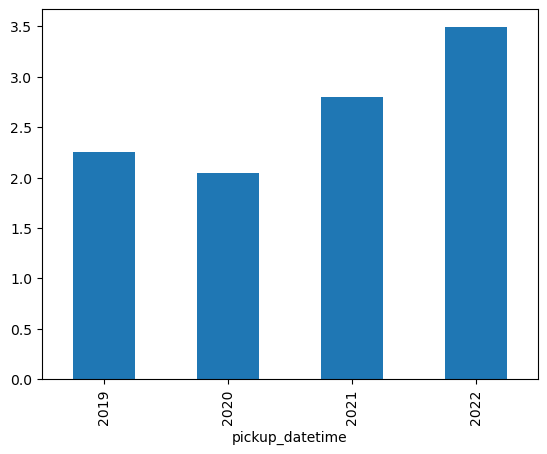

In [174]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'tip_rate':['mean','var']})[('tip_rate','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

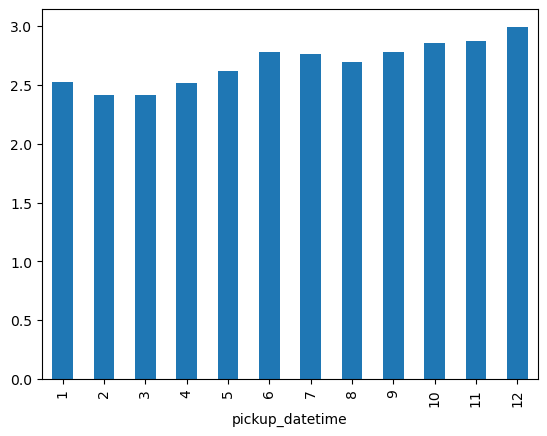

In [175]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'tip_rate':['mean','var']})[('tip_rate','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

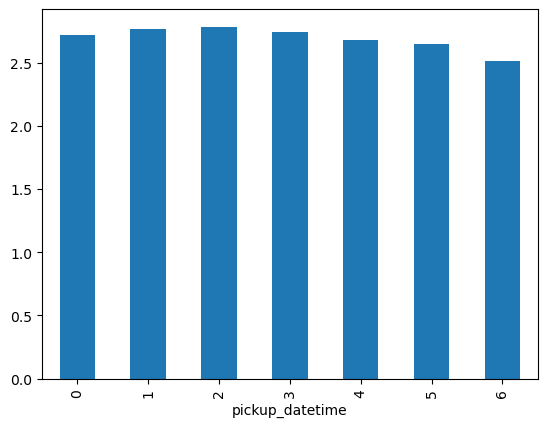

In [176]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'tip_rate':['mean','var']})[('tip_rate','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

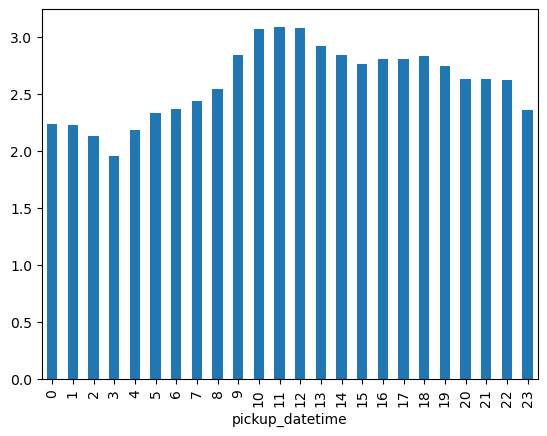

In [178]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.hour).agg({'tip_rate':['mean','var']})[('tip_rate','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

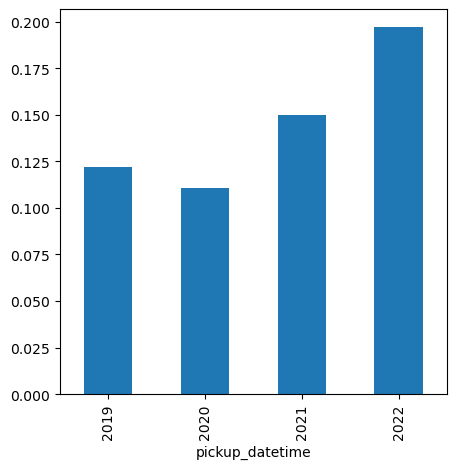

In [242]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'is_tip':['sum','mean']})['is_tip','mean'].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

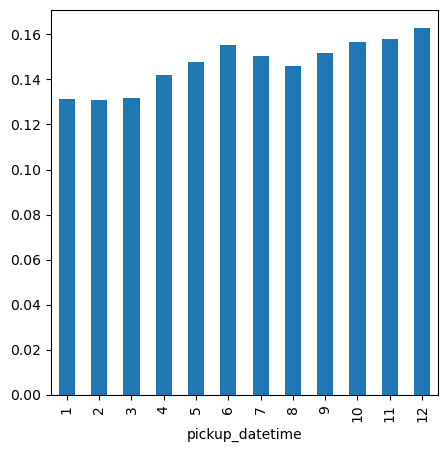

In [243]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'is_tip':['sum','mean']})['is_tip','mean'].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

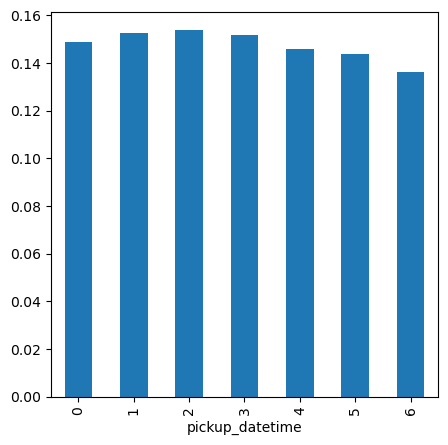

In [244]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'is_tip':['mean','sum']})[('is_tip','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

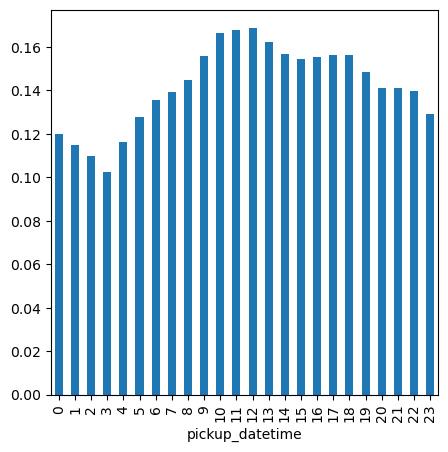

In [245]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.hour).agg({'is_tip':['mean','var']})[('is_tip','mean')].plot(kind='bar')

# -2. Location

In [213]:
taxi_zone = pd.read_csv('D:/Working_Place/new_uber/data/taxi_zone_lookup.csv')
taxi_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


<AxesSubplot:xlabel='PULocationID'>

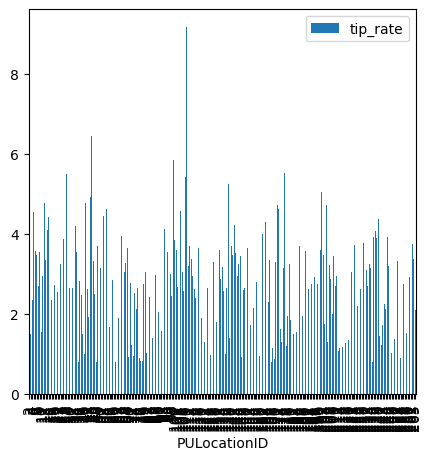

In [208]:
uber_trip_sample.groupby(uber_trip_sample.PULocationID).agg({'tip_rate':'mean'}).plot(kind='bar')

<AxesSubplot:xlabel='PULocationID'>

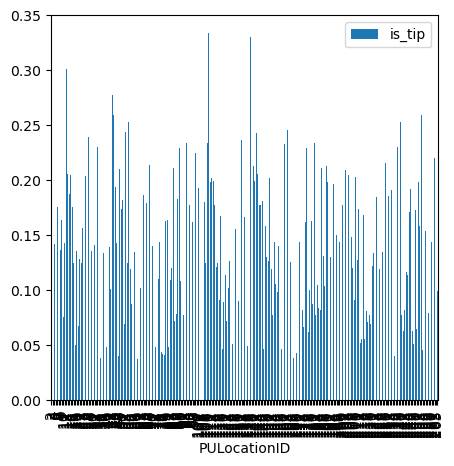

In [247]:
uber_trip_sample.groupby(uber_trip_sample.PULocationID).agg({'is_tip':'mean'}).plot(kind='bar')

<AxesSubplot:xlabel='DOLocationID'>

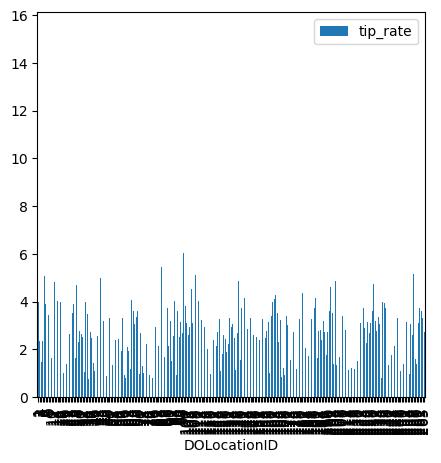

In [254]:
uber_trip_sample.groupby(uber_trip_sample.DOLocationID).agg({'tip_rate':'mean'}).plot(kind='bar')

<AxesSubplot:xlabel='DOLocationID'>

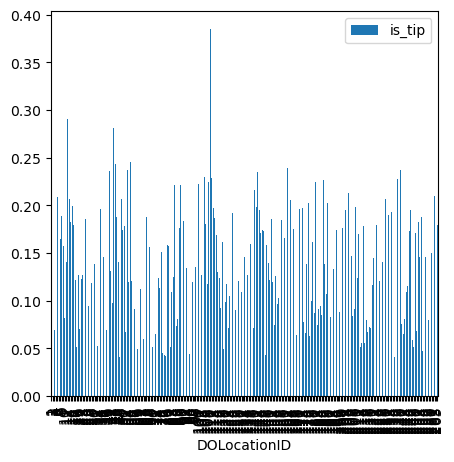

In [249]:
uber_trip_sample.groupby(uber_trip_sample.DOLocationID).agg({'is_tip':'mean'}).plot(kind='bar')

In [251]:
uber_trip_sample.groupby(uber_trip_sample.DOLocationID).agg({'is_tip':'mean'})[uber_trip_sample.groupby(uber_trip_sample.DOLocationID).agg({'is_tip':'mean'}).is_tip>0.3]

,is_tip
DOLocationID,
110,0.384615
138,0.304349


In [253]:
taxi_zone[(taxi_zone.LocationID==110) | (taxi_zone.LocationID==138)]

,LocationID,Borough,Zone,service_zone
109,110,Staten Island,Great Kills Park,Boro Zone
137,138,Queens,LaGuardia Airport,Airports


# 4. Regression

In [255]:
uber_trip_sample

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed,tip_rate,is_tip
index,,,,,,,,,,,,,,,,,,,,,
1079641,HV0003,B02878,B02878,2019-02-02 09:45:14,2019-02-02 09:51:18,2019-02-02 09:52:29,2019-02-02 10:08:57,213,20,8.1788,...,2.00,8.31,Y,Y,N,N,NaN,29.831489,26.281209,1
18360431,HV0003,B02876,B02876,2019-02-26 14:58:01,2019-02-26 14:58:43,2019-02-26 15:00:49,2019-02-26 15:22:05,173,70,5.0876,...,3.00,17.05,N,N,N,N,NaN,14.353730,24.271845,1
12815512,HV0003,B02878,B02878,2019-02-18 18:27:56,2019-02-18 18:28:50,2019-02-18 18:31:32,2019-02-18 18:50:35,42,166,1.8515,...,0.00,10.77,N,N,N,N,NaN,5.836602,0.000000,0
10272561,HV0003,B02872,B02872,2019-02-15 08:32:59,2019-02-15 08:36:00,2019-02-15 08:37:44,2019-02-15 08:49:41,151,239,2.7209,...,0.00,7.79,N,N,N,N,NaN,13.680503,0.000000,0
5574976,HV0003,B02880,B02880,2019-02-08 20:39:09,2019-02-08 20:39:49,2019-02-08 20:42:41,2019-02-08 20:52:19,90,158,2.0930,...,0.00,6.62,N,N,N,N,NaN,13.035986,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633529,HV0003,B03404,B03404,2022-12-04 19:44:40,2022-12-04 19:46:10,2022-12-04 19:47:23,2022-12-04 19:57:32,161,236,3.2522,...,0.00,8.72,N,N,,N,N,19.224828,0.000000,0
2098702,HV0003,B03404,B03404,2022-12-03 23:50:26,2022-12-03 23:59:09,2022-12-03 23:59:57,2022-12-04 00:09:42,256,79,3.9767,...,1.00,10.49,N,N,,N,N,24.472000,5.285412,1
10187430,HV0003,B03404,B03404,2022-12-16 07:39:15,2022-12-16 07:43:05,2022-12-16 07:43:54,2022-12-16 08:09:26,140,143,4.7334,...,0.00,29.44,N,N,,N,N,11.122872,0.000000,0


In [258]:
uber_trip_sample.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'average_speed', 'tip_rate',
       'is_tip'],
      dtype='object')

<AxesSubplot:>

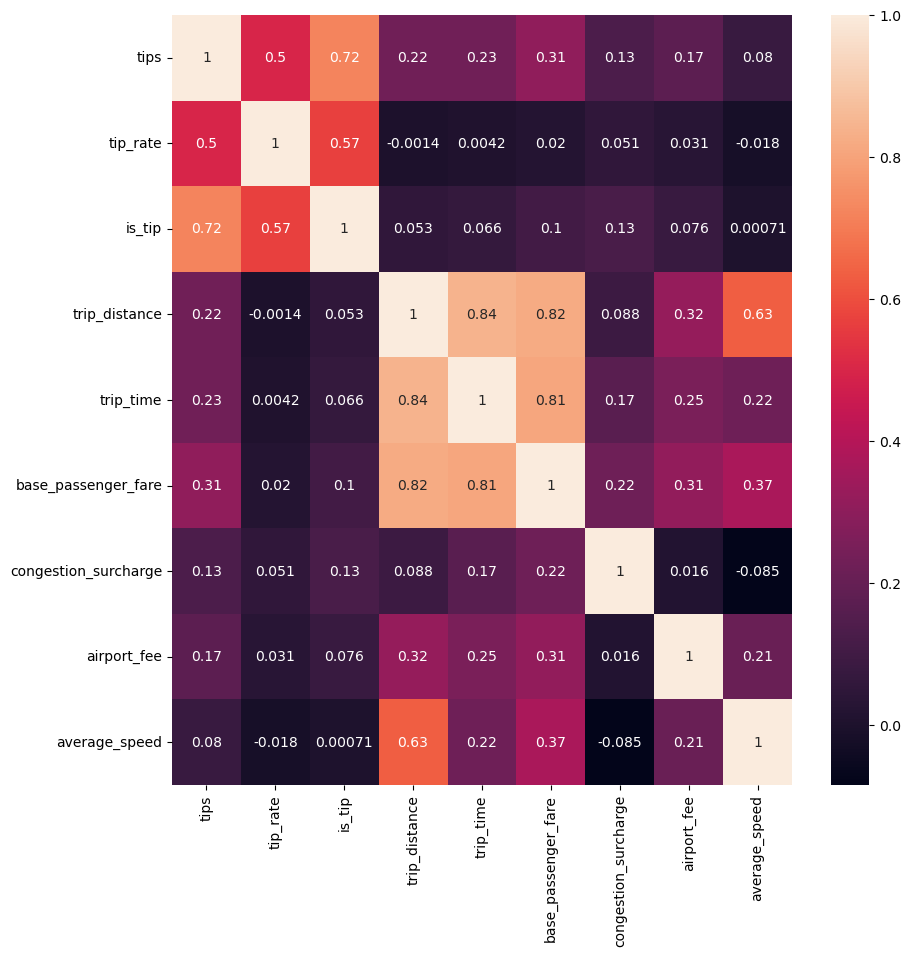

In [265]:
corr_dt=uber_trip_sample[['tips','tip_rate','is_tip','trip_distance','trip_time','base_passenger_fare','congestion_surcharge','airport_fee','average_speed']].corr()
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(corr_dt, annot=True)

In [ ]:
zeroth_regression = smf.ols("tips ~ trip_time + average_speed+\
                            C(pickup_datetime.dt.year)+\
                            C(pickup_datetime.dt.month)+\
                            C(pickup_datetime.dt.day)+\", 
                           data=uber_trip_sample).fit()
print(zeroth_regression.summary())